* Wire ID from ICEDUST = 

In [8]:
import numpy as np
from root_numpy import *
from ROOT import TClonesArray, TFile

In [9]:
import sys
%run visualizations.ipynb
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
from icedust_hits import AllHits
hits = AllHits('../data/background_sample.root', tree="TruthDir/CDC_Hits")
rootArray = root2array('../data/background_sample.root',treename="TruthDir/CDC_Hits")

In [11]:
# Truth Values
labels = numpy.vstack(hits.get_hit_types(i) for i in range(hits.n_events))
event = 2
print "From hits.py"
print np.array(np.where(labels[event] == 1)[0])
print "From ICEDUST: wireID"
print sort(rootArray["WireID"][event])
print "Difference"
print np.setdiff1d(np.array(rootArray["WireID"][event]),np.array(np.where(labels[event] == 1)[0]))
print "From ICEDUST: cellID"
print sort(rootArray["CellID"][event])

From hits.py
[  12   13  144  145  210  346  347  413  414  554  555  623  624  768  838
  839  987  988 1060 1061 1213 1214 1287 1288 1445 1521 1522 1682 1683 1760
 1761 1926 2006 2257 2258 2514 2515 2777 2778 3047 3048 3322 3323 3603 3604
 3890 3891 4183 4184]
From ICEDUST: wireID
[  12   13  144  145  210  346  347  413  414  554  555  623  624  768  838
  839  987  988 1060 1061 1213 1214 1287 1288 1445 1521 1522 1682 1683 1760
 1761 1926 2006 2257 2258 2514 2515 2777 2778 3047 3048 3322 3323 3603 3604
 3890 3891 4183 4184]
Difference
[]
From ICEDUST: cellID
[  1   2   2   3   3   4   4   5   5   5   6   6   6   7   7   8   8   8
   9   9   9  10  10  10  10  11  11  11  11  12  12  12  12  13 144 145
 148 149 152 153 156 159 160 163 164 167 170 171 174]


In [12]:
# Check for multiple hits in one channel
n_events = 0
total_hits = 0
errors = []
for event in range(labels.shape[0]):
    channels = np.array(np.where(labels[event] == 1)[0])
    wire_hits = rootArray["WireID"][event]
    n_channels = channels.shape[0]
    n_hits = len(wire_hits)
    missing_wires = np.setdiff1d(wire_hits, channels)
    if n_channels != n_hits:
        print "Error at "+str(event) +" "+ str(n_channels) +" "+ str(n_hits)
        print "Wire(s) " + str(missing_wires) + " are missing"
        errors += [event]
    if n_hits != 0:
        n_events += 1
    total_hits += n_hits
print "Number of events is "+str(n_events)
print "Number of hits is "+str(total_hits)
print "Average is "+str(total_hits/float(n_events))

Number of events is 55
Number of hits is 2158
Average is 39.2363636364


679
Number of Protons 8050014


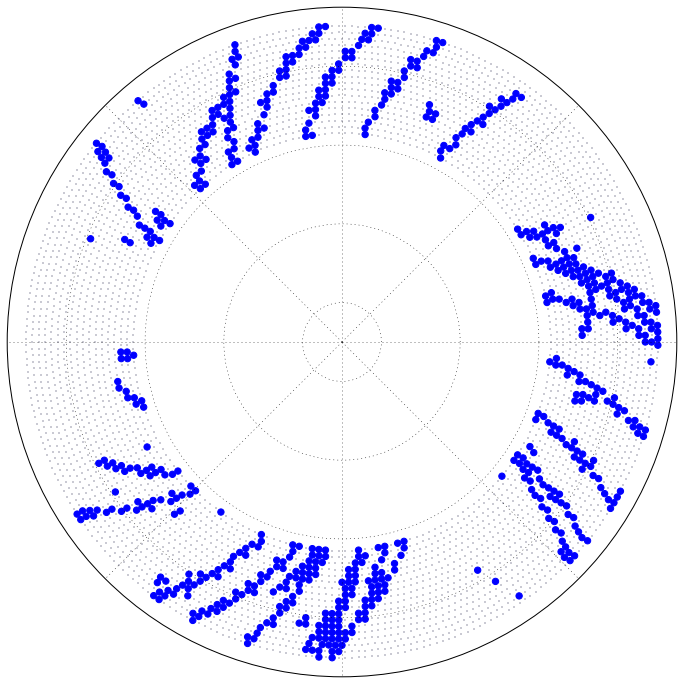

In [26]:
# Basic output
dead_wires = [1751, 2249, 2507, 1997]
new_labels = np.zeros(4482)
total_protons = 0
for event in range(20):
        new_labels += labels[event]
        total_protons += rootArray["NProtons"][event]
new_labels = new_labels != 0
plot_output(new_labels, hits.cydet)
print sum(new_labels)
print "Number of Protons {}".format(total_protons)
show()

In [17]:
%run visualizations.ipynb

Populating the interactive namespace from numpy and matplotlib


(array([  7.,  10.,   6.,  12.,   2.,   2.,   2.,   6.,   2.,   6.,   1.,
          0.,   0.,   0.,   2.,   0.,   1.,   0.,   0.,   1.]),
 array([       0. ,    81200.1,   162400.2,   243600.3,   324800.4,
          406000.5,   487200.6,   568400.7,   649600.8,   730800.9,
          812001. ,   893201.1,   974401.2,  1055601.3,  1136801.4,
         1218001.5,  1299201.6,  1380401.7,  1461601.8,  1542801.9,
         1624002. ]),
 <a list of 20 Patch objects>)

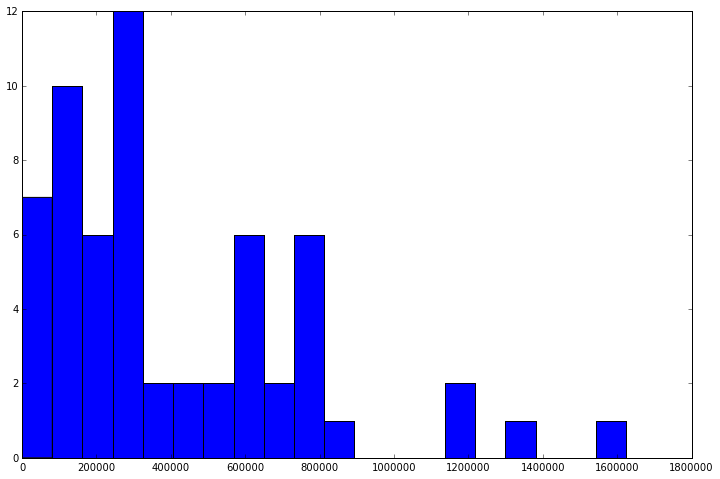

In [20]:
figsize(12,8)
plt.hist(rootArray["NProtons"], bins=20)

In [21]:
print sum(rootArray["NProtons"])

24652044


In [27]:
sig_hits = AllHits('../data/signal_hits.root', tree="TruthDir/CDC_Hits")
sig_rootArray = root2array('../data/signal_hits.root',treename="TruthDir/CDC_Hits")